# Analyzing Zomato Restaurants Data


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

In [110]:
df = pd.read_csv('zomato.csv',skipinitialspace = True)

In [111]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Number of restrants country wise
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

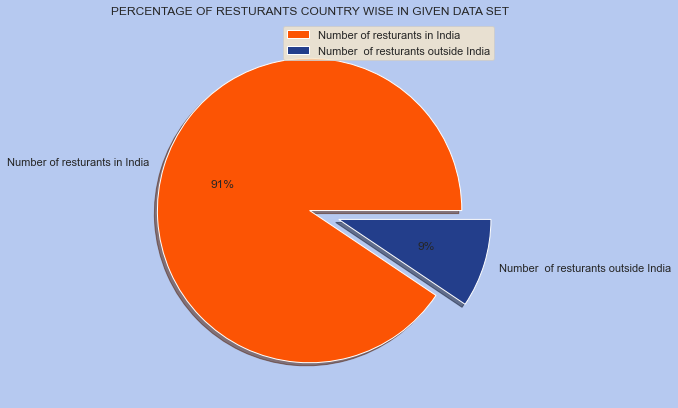

We observe majority of resturants in the dataset are from india


In [112]:
freq = list(df['Country Code'].value_counts())
number_of_indian_resturants = freq[0]
number_of_other_country_resturants = sum(freq)-freq[0]
number_of_other_country_resturants,number_of_indian_resturants
y = np.array([number_of_indian_resturants,number_of_other_country_resturants])
mylabels = ["Number of resturants in India", "Number  of resturants outside India"]
my_colors = ['#FC5404','#233E8B']
myexplode = [0,0.2]
plt.figure(figsize =(14,7))
plt.pie(y,labels=mylabels,explode = myexplode,shadow = True,colors=my_colors,autopct='%1.0f%%')
plt.title("Percentage of Resturants Country wise in given data set".upper())
plt.legend()
plt.show()
print("We observe majority of resturants in the dataset are from india")

# Exploring Indian Resturants
<hr style="height:4px;border-width:0;color:gray;background-color:#C67ACE">

In [113]:
IndianResturants = df[df['Country Code'] == 1]

##  Analyzing number of Resturants across the cities 
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

In [114]:
IndianResturants['City'].unique()
city_dict = {}
for i in range(IndianResturants.shape[0]):
    city = IndianResturants.iloc[i, 3]
    if city in city_dict:
        city_dict[city] += 1
    else:
        city_dict[city] = 1
sorted_dict = dict(sorted(city_dict.items(),key=lambda item: item[1],reverse=True))
print(sorted_dict)
print('\n'+'\033[1m'+"We see more number of resturants in data are in Delhi,Gurgaon,Nodia,Faridabad \ni.e in National Capital Range\n")

{'New Delhi': 5473, 'Gurgaon': 1118, 'Noida': 1080, 'Faridabad': 251, 'Ghaziabad': 25, 'Ahmedabad': 21, 'Amritsar': 21, 'Bhubaneshwar': 21, 'Guwahati': 21, 'Lucknow': 21, 'Agra': 20, 'Allahabad': 20, 'Aurangabad': 20, 'Bangalore': 20, 'Bhopal': 20, 'Chennai': 20, 'Coimbatore': 20, 'Dehradun': 20, 'Goa': 20, 'Indore': 20, 'Jaipur': 20, 'Kanpur': 20, 'Kochi': 20, 'Kolkata': 20, 'Ludhiana': 20, 'Mangalore': 20, 'Mumbai': 20, 'Mysore': 20, 'Nagpur': 20, 'Nashik': 20, 'Patna': 20, 'Puducherry': 20, 'Pune': 20, 'Ranchi': 20, 'Surat': 20, 'Vadodara': 20, 'Varanasi': 20, 'Vizag': 20, 'Chandigarh': 18, 'Hyderabad': 18, 'Secunderabad': 2, 'Mohali': 1, 'Panchkula': 1}

We see more number of resturants in data are in Delhi,Gurgaon,Nodia,Faridabad 
i.e in National Capital Range



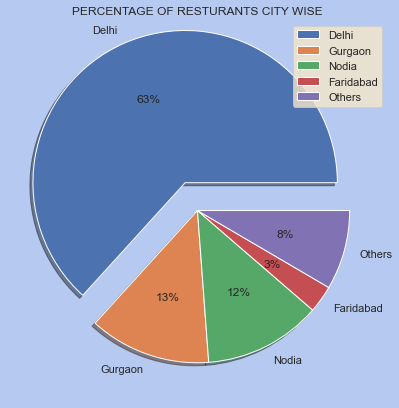

In [115]:
plt.figure(figsize =(14,7))
y = np.array([5473,1118, 1080, 251,730])
mylabels = ["Delhi", "Gurgaon", "Nodia", "Faridabad","Others"]
myexplode = [0.2, 0, 0, 0,0]
plt.pie(y,labels=mylabels,explode = myexplode,shadow = True,autopct='%1.0f%%')
plt.legend()
plt.title("Percentage of Resturants City wise".upper())
plt.show()

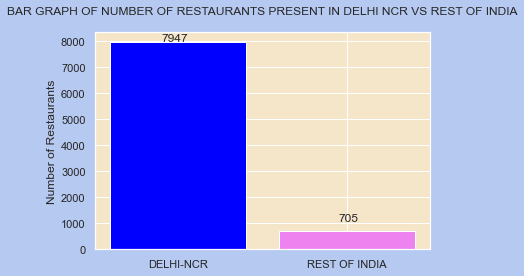

In [116]:
DelhiNCR = city_dict['New Delhi']+city_dict['Gurgaon']+city_dict['Noida']+city_dict['Faridabad']+city_dict['Ghaziabad']
plt.bar(['DELHI-NCR', 'REST OF INDIA'],[DelhiNCR,IndianResturants.shape[0]-DelhiNCR],color=['blue', 'violet'])
plt.text(-0.1,8000,DelhiNCR)
plt.text(0.95,1100,IndianResturants.shape[0]-DelhiNCR)
plt.ylabel("Number of Restaurants")
plt.title("Bar graph of number of restaurants present in Delhi NCR vs Rest of India".upper()+"\n")
plt.show()

# Cuisines which can not be found in restaurant of Delhi NCR but can be found in rest of India
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [117]:
DelhiNCR = ["New Delhi","Ghaziabad","Noida","Gurgaon","Faridabad"]
DelhiNCRCuisines = []
Other_Cities_Cuisines = []
for i in range(IndianResturants.shape[0]):
    city = IndianResturants.iloc[i,3]
    cuisine_list = IndianResturants.iloc[i,9].split(',')
    if city in DelhiNCR:
        for j in range(len(cuisine_list)):
            cuisine = cuisine_list[j].strip()
            if cuisine not in DelhiNCRCuisines:
                DelhiNCRCuisines.append(cuisine)
    else:
        for j in range(len(cuisine_list)):
            cuisine = cuisine_list[j].strip()
            if cuisine not in Other_Cities_Cuisines:
                Other_Cities_Cuisines.append(cuisine)       
#Cuisines which can not be found in restaurant of Delhi NCR but can be found in rest of India
target = []
for i in range(len(Other_Cities_Cuisines)):
    if Other_Cities_Cuisines[i] not in DelhiNCRCuisines:
        if Other_Cities_Cuisines[i] not in target:
            target.append(Other_Cities_Cuisines[i])

print('\033[1m'+"The Cusines which are not found in Delhi_NCR but found in rest of india are:".upper())
for i in range(len(target)):
    print(str(i+1)+")" + str(target[i]))
print("_____________")

THE CUSINES WHICH ARE NOT FOUND IN DELHI_NCR BUT FOUND IN REST OF INDIA ARE:
1)German
2)Malwani
3)BBQ
4)Cajun
_____________


## Top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

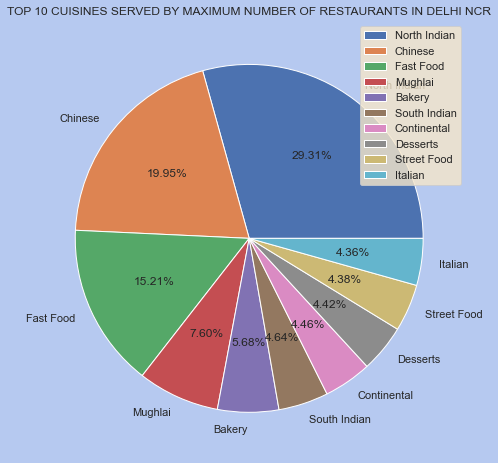


-------------------------------------------------------------------------------------



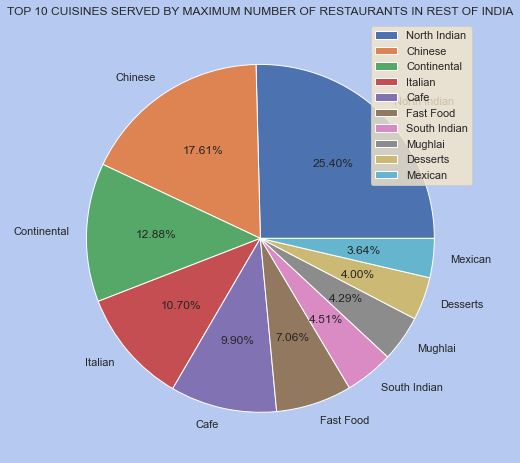


-------------------------------------------------------------------------------------



In [118]:
DelhiNCR = ["New Delhi","Ghaziabad","Noida","Gurgaon","Faridabad"]
DelhiNCRCuisines = {}
Other_Cities_Cuisines = {}
for i in range(IndianResturants.shape[0]):
    city = IndianResturants.iloc[i,3]
    cuisine_list = IndianResturants.iloc[i,9].split(',')
    if city in DelhiNCR:
        for j in range(len(cuisine_list)):
            cuisine = cuisine_list[j].strip()
            if cuisine not in DelhiNCRCuisines:
                DelhiNCRCuisines[cuisine] = 1
            else:
                DelhiNCRCuisines[cuisine] +=1
    else:
        for j in range(len(cuisine_list)):
            cuisine = cuisine_list[j].strip()
            if cuisine not in Other_Cities_Cuisines:
                Other_Cities_Cuisines[cuisine] = 1
            else:
                Other_Cities_Cuisines[cuisine] +=1            
sorted_dict1 = dict(sorted(DelhiNCRCuisines.items(),key=lambda item: item[1],reverse=True))
sorted_dict2 = dict(sorted(Other_Cities_Cuisines.items(),key=lambda item: item[1],reverse=True))
i=1
DelhiNCRCuisines_top10 = []
DelhiNCRCuisines_freq = []
for key in sorted_dict1:
    DelhiNCRCuisines_top10.append(key)
    DelhiNCRCuisines_freq.append(sorted_dict1[key])
    i = i+1
    if i==11:
        break
plt.figure(figsize =(14,8))
plt.pie(DelhiNCRCuisines_freq,labels=DelhiNCRCuisines_top10,autopct = "%.2f%%")
plt.title("Top 10 cuisines served by maximum number of restaurants in Delhi NCR".upper())
plt.legend()
plt.show()
i=1
print("\n-------------------------------------------------------------------------------------\n")
Other_Cities_Cuisines_top10 = []
Other_Cities_Cuisines_freq = []
for key in sorted_dict2:
    Other_Cities_Cuisines_top10.append(key)
    Other_Cities_Cuisines_freq.append(sorted_dict2[key])
    i = i+1
    if i==11:
        break
plt.figure(figsize =(14,8))
plt.pie(Other_Cities_Cuisines_freq,labels=Other_Cities_Cuisines_top10,autopct = "%.2f%%")
plt.title("Top 10 cuisines served by maximum number of restaurants in rest of India".upper())
plt.legend()
plt.show()
print("\n-------------------------------------------------------------------------------------\n")

#  Short detailed analysis of how the rating is affected by restaurant due to diff. features
<hr style="height:4px;border-width:0;color:gray;background-color:#B980F0">

## How does aggregate user rating varies with number of votes
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

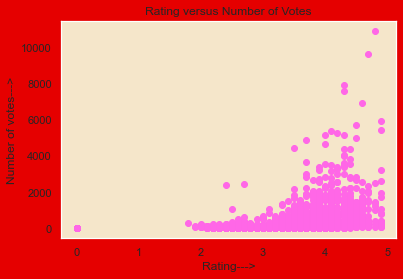

 Observation : As the number of votes increases the chance of getting higher rating increases
 Resturants having more than 6000 votes have rating between  4 and 5
 However resturants having votes less than 2000 have wide variety of ratings from 2 to 5


In [120]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:red')
plt.scatter(IndianResturants['Aggregate rating'],IndianResturants['Votes'],color='#FF67E7')
plt.xlabel('Rating--->', size=12)
plt.ylabel('Number of votes--->', size=12)
plt.title('Rating versus Number of Votes')
plt.grid()
plt.show()
print(" Observation : As the number of votes increases the chance of getting higher rating increases\n Resturants having more than 6000 votes have rating between  4 and 5\n However resturants having votes less than 2000 have wide variety of ratings from 2 to 5")

## How does aggregate user rating varies with number of cuisines served
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

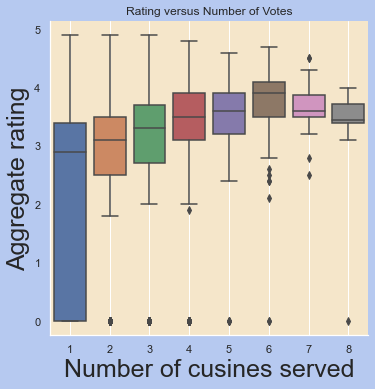

Observations
1)As number of cusines served increases,the rating gradually converges to between 3 and 5
2)Resturants having more number of cusines have higher low ratings,
compared to Resturants having less number of cusines
3)Resturants having more number of cusines have lower high ratings,
compared to Resturants having less number of cusines


In [103]:
number_of_cusines_served=[]
for i in range(len(IndianResturants['Cuisines'])):
    num = len(list(IndianResturants['Cuisines'])[i].split(','))
    number_of_cusines_served.append(num)
# sns.set(rc={'axes.facecolor':'#F5E6CA', 'figure.facecolor':'pink'})
sns.catplot(x=number_of_cusines_served, y='Aggregate rating', data=IndianResturants,kind = "box")
plt.xlabel('Number of cusines served', size=25)
plt.ylabel('Aggregate rating', size=25)
plt.title('Rating versus Number of Votes')
plt.grid()
plt.show()
print("Observations")
print("1)As number of cusines served increases,the rating gradually converges to between 3 and 5")
print("2)Resturants having more number of cusines have higher low ratings,\ncompared to Resturants having less number of cusines")
print("3)Resturants having more number of cusines have lower high ratings,\ncompared to Resturants having less number of cusines")

## How does aggregate user rating varies with average cost of the restaurant
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

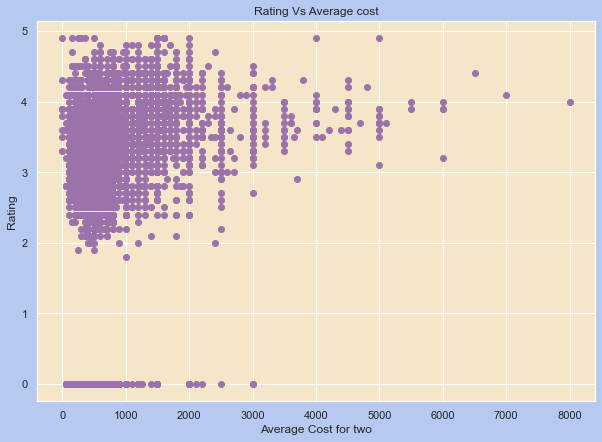

More people tend to go for lower cost resturants in the given dataset.
Resturants having less average cost have wide range of ratings,which is obvious from the given data 
as there are more people in the given dataset who goes to lower average cost resturants.
As the avg cost increases there are fewer lower ratings.


In [101]:
plt.figure(figsize =(10,7))
sns.set(rc={'axes.facecolor':'#F5E6CA', 'figure.facecolor':'#B6C9F0'})
plt.scatter(x=IndianResturants['Average Cost for two'], y=IndianResturants['Aggregate rating'],color='#9B72AA')
plt.xlabel("Average Cost for two")
plt.ylabel("Rating")
plt.title("Rating Vs Average cost")
plt.show()
print("More people tend to go for lower cost resturants in the given dataset.")
print("Resturants having less average cost have wide range of ratings,which is obvious from the given data \nas there are more people in the given dataset who goes to lower average cost resturants.")
print("As the avg cost increases there are fewer lower ratings.")

## Bar graph of top 15 restaurants having a maximum number of outlets

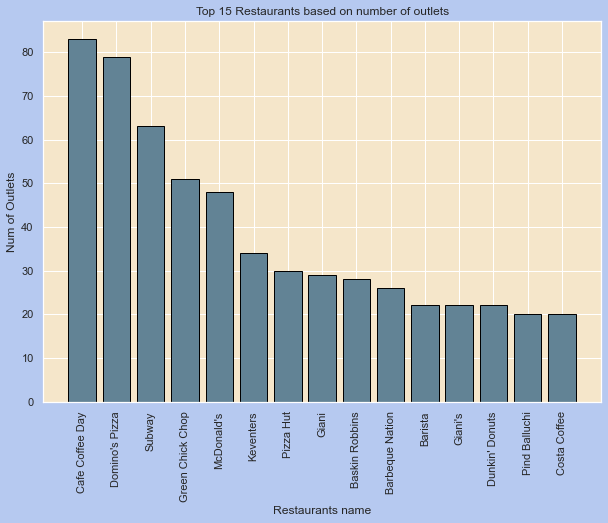

In [102]:
outlets = dict(df['Restaurant Name'].value_counts())
names = list(outlets.keys())[:15]
freq = list(outlets.values())[:15]
plt.figure(figsize=(10,7))
plt.bar(names, freq,color = '#628395',edgecolor = 'black')
plt.xticks(rotation = 90)
plt.xlabel("Restaurants name",size=12)
plt.ylabel("Num of Outlets",size=12)
plt.title("Top 15 Restaurants based on number of outlets")
# plt.grid()
plt.show()

## The histogram of aggregate rating of restaurant

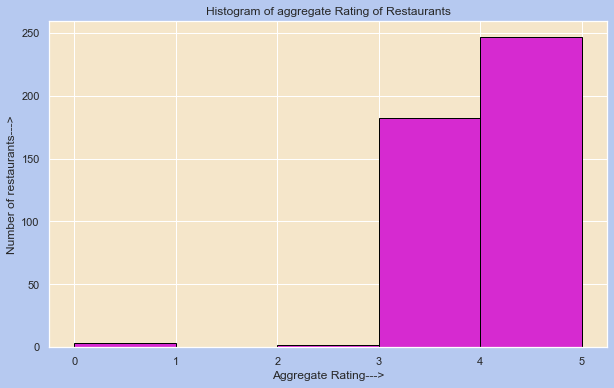

In [106]:
plt.figure(figsize=(10,6))
plt.hist(df['Aggregate rating'],edgecolor = 'black', color = '#D62AD0',bins=range(6))
plt.xlabel('Aggregate Rating--->')
plt.ylabel('Number of restaurants--->')
plt.title("Histogram of aggregate Rating of Restaurants")
plt.show()

## Bar graph of top 10 restaurants with the highest number of votes¶

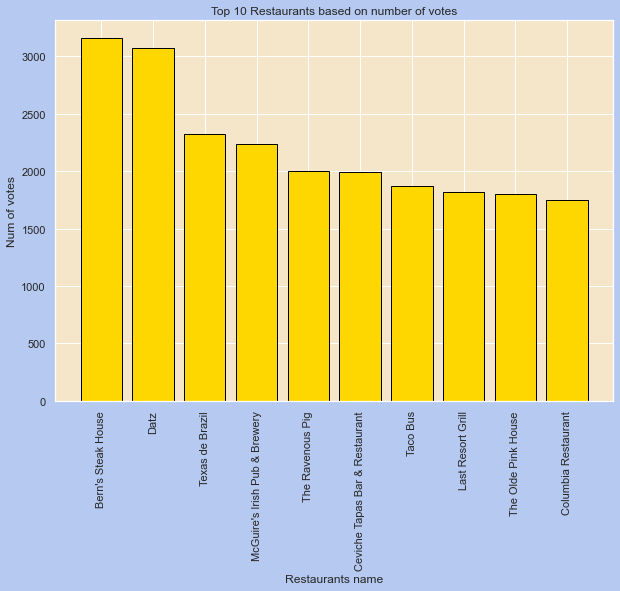

In [107]:
votes = {}
for i in range(len(df)):
    name = df.iloc[i,1]
    num  = df.iloc[i,-1]
    if name not in votes:
        votes[name] = num
    else:
        votes[name] += num
sorted_dict = dict(sorted(votes.items(),key=lambda item: item[1],reverse=True))
top_votes_names = list(sorted_dict.keys())[:10]
top_votes_freq = list(sorted_dict.values())[:10]
plt.figure(figsize=(10,7))
plt.bar(top_votes_names, top_votes_freq,color = 'gold',edgecolor = 'black')
plt.xticks(rotation = 90)
plt.xlabel("Restaurants name",size=12)
plt.ylabel("Num of votes",size=12)
plt.title("Top 10 Restaurants based on number of votes")
plt.show()

## Pie graph of top 10 cuisines present in restaurants in the USA

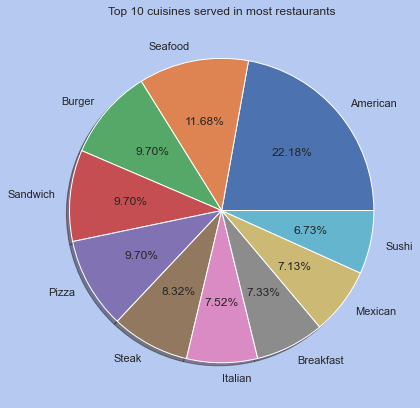

In [108]:
df = df[df['Country Code'] == 216]
cuisine_list = {}
for i in range(len(df)):
    if type(df.iloc[i,9]) == float:
        continue
    cuisine = df.iloc[i,9].split(',')
    for j in range(len(cuisine)):
        if cuisine[j].strip() not in cuisine_list:
            cuisine_list[cuisine[j].strip()] =1
        else:
            cuisine_list[cuisine[j].strip()] +=1
sorted_dict = dict(sorted(cuisine_list.items(),key=lambda item: item[1],reverse=True))
resturant_names = list(sorted_dict.keys())[:10]
cusine_freq = list(sorted_dict.values())[:10]
plt.figure(figsize = (10, 7))
plt.pie(cusine_freq, labels = resturant_names, autopct = "%1.2f%%",shadow=True)
plt.title("Top 10 cuisines served in most restaurants")
plt.show()